In [ ]:
import os
INPUT_DIR = "/content/drive/MyDrive/EpilepsyMRI"
OUTPUT_DIR = "/content/drive/MyDrive/Epilepsy_preprocess_MRI"


In [ ]:
import cv2
import numpy as np

In [ ]:
def crop_brain(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cnt)
        image = image[y:y+h, x:x+w]

    return image


In [ ]:
def resize_image(image, size=224):
    return cv2.resize(image, (size, size))

In [ ]:
def normalize_image(image):
    image = image.astype(np.float32)
    mean = np.mean(image)
    std = np.std(image) + 1e-8
    return (image - mean) / std


In [ ]:
def preprocess_mri(image):
    image = crop_brain(image)
    image = resize_image(image)
    image = normalize_image(image)
    return image

In [ ]:
from tqdm import tqdm

splits = ["train", "test"]
classes = ["epilepsy ", "healthy "]

for split in splits:
    for cls in classes:
        input_folder = os.path.join(INPUT_DIR, split, cls)
        output_folder = os.path.join(OUTPUT_DIR, split, cls)
        os.makedirs(output_folder, exist_ok=True)
        for file in tqdm(os.listdir(input_folder), desc=f"{split}-{cls}"):
            img_path = os.path.join(input_folder, file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            processed = preprocess_mri(img)
            save_img = ((processed - processed.min()) /
                        (processed.max() - processed.min()) * 255).astype(np.uint8)

            cv2.imwrite(os.path.join(output_folder, file), save_img)



test-healthy : 100%|██████████| 70/70 [00:35<00:00,  1.95it/s]


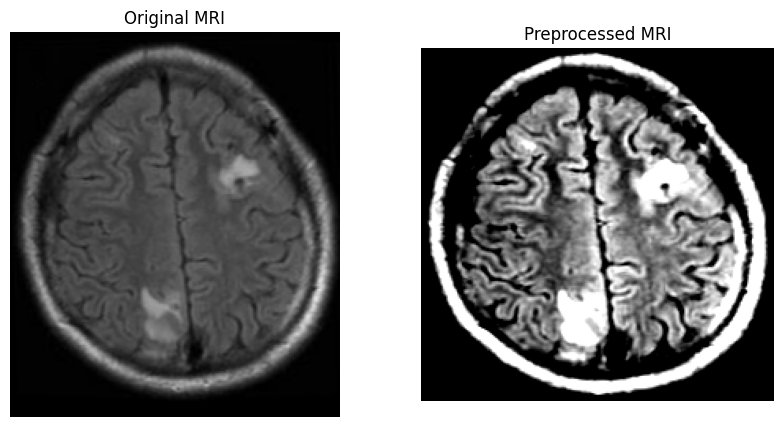

In [ ]:
import matplotlib.pyplot as plt

sample_path = os.path.join(INPUT_DIR, "train", "epilepsy ")
file = os.listdir(sample_path)[0]
original = cv2.imread(os.path.join(sample_path, file))
processed = preprocess_mri(original)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original MRI")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(processed, cmap="gray")
plt.title("Preprocessed MRI")
plt.axis("off")

plt.show()


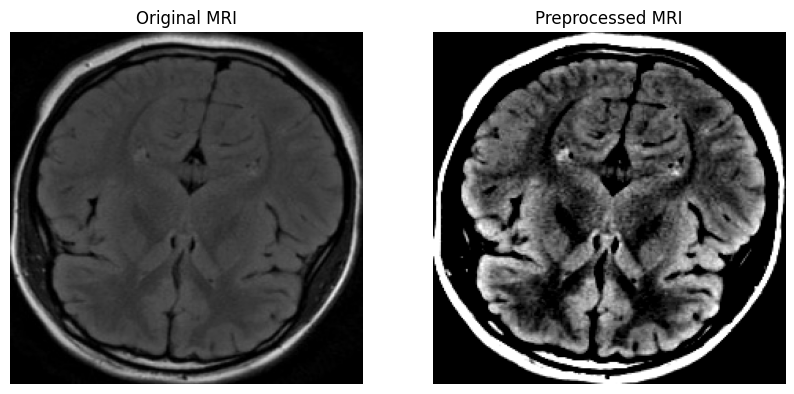

In [ ]:
import matplotlib.pyplot as plt

sample_path = os.path.join(INPUT_DIR, "train", "healthy ")
file = os.listdir(sample_path)[1]
original = cv2.imread(os.path.join(sample_path, file))
processed = preprocess_mri(original)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original MRI")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(processed, cmap="gray")
plt.title("Preprocessed MRI")
plt.axis("off")

plt.show()
